In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.datasets import load_iris
from scipy.stats import multivariate_normal
plt.style.use(['ggplot'])

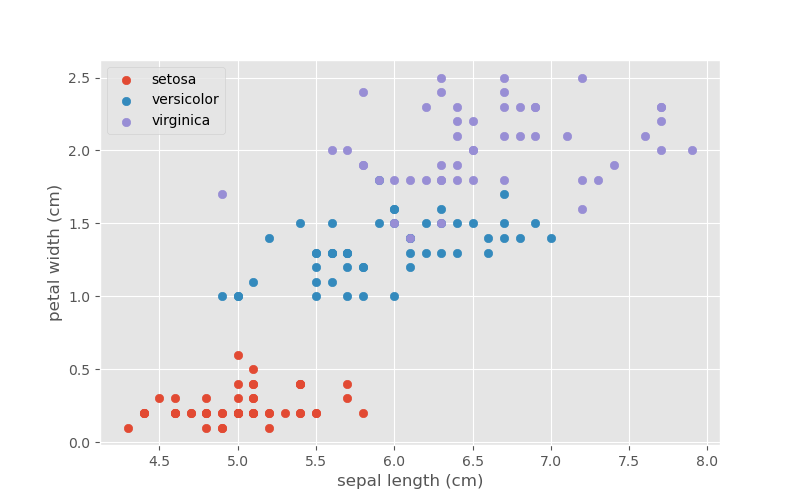

In [41]:
iris = load_iris()
name=iris.feature_names
name_tarjet=iris.target_names
X = iris.data[:,[0,3]] 
y = iris.target

fig, ax = plt.subplots(figsize=(8,5))
for i in range(3):
    ax.scatter(X[y==i,0],X[y==i,1])
plt.xlabel(name[0])
plt.ylabel(name[3])
plt.legend(name_tarjet)
plt.show()

In [42]:
ch=X.shape[1]
m=len(y)
n=len(np.unique(y))
phi=np.zeros((n,))
media=np.zeros((n,ch))
cova=np.zeros((ch,ch))
for i in range(n):
    phi[i]=np.sum(y==i)/m
    media[i,:]=np.mean(X[y==i],axis=0)
    cova=cova+(X[y==i]-media[i,:]).T@(X[y==i]-media[i,:])
cova=cova/m

48


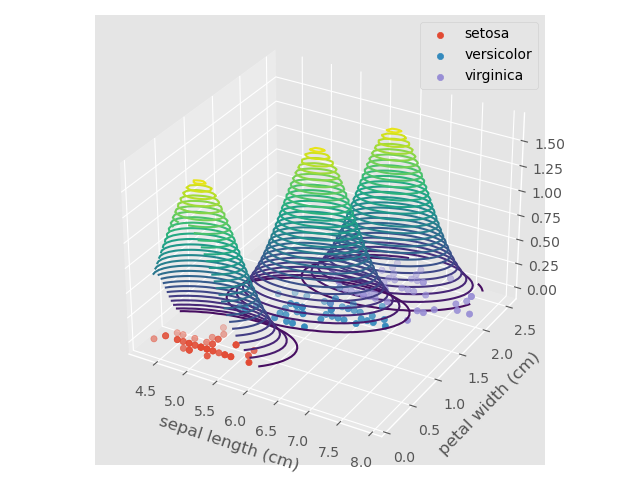

In [43]:
%matplotlib widget
x1 = np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.05)
x2 = np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.05)
print(len(x2))
xx1, xx2 = np.meshgrid(x1, x2)
xt=np.c_[xx1.ravel(),xx2[:].ravel()]
fig = plt.figure();
ax = fig.add_subplot(projection='3d')
# fig, ax = plt.subplots(figsize=(8,5))
for i in range(3):
    ax.scatter(X[y==i,0],X[y==i,1])
plt.xlabel(name[0])
plt.ylabel(name[3])
plt.legend(name_tarjet)


for i in range(n):
    z=multivariate_normal.pdf(xt, mean=media[i,:] , cov=cova) 
    z=z.reshape(len(x2),len(x1))
    plt.contour(xx1,xx2,z,30)
plt.tight_layout()
plt.show()